# Red Wine Quality Prediction

**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

**Data Ingestion-Reading the csv file**

In [2]:
df=pd.read_csv("winequality-red.csv")

**Generating Basic Information about Data**

In [3]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Columns: 12 entries, fixed acidity to quality
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**First few rows of dataframe**

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Dimension of dataframe**

In [5]:
df.shape

(1599, 12)

**Columns in dataframe**

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Check the data type and null values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Check for duplicates**

In [8]:
df.duplicated().sum()

240

**Inference**
1. There are total **1599 Records/Rows in the dataset**. There are total **12 Features/columns** in the dataset.
2. All the **features** present is in the dataset is **numerical**. **No Categorical Features** present in the dataset.
3. **None** of the features is having **missing values**. So we can say the dataset will be more reliable for prediction wine   quality.
4. There is total **240 Duplicate Records**, which has to be handeled.

**Droping the duplicates**

In [9]:
df.drop_duplicates(inplace=True)

**Analysing descriptive statistics**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


**Inference**
1. The **minimum wine quality is 3** and the **maximum wine quality is 8.**
2. The **average alchol** a red wine holds according to the data is **10.4**.
3. There a **huge difference** between **average total sulfur dioxide** and **maximum total sulfur dioxide**.

**Correlation**

In [11]:
correlation=df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**Heatmap-Visualizing correlation**

<Axes: >

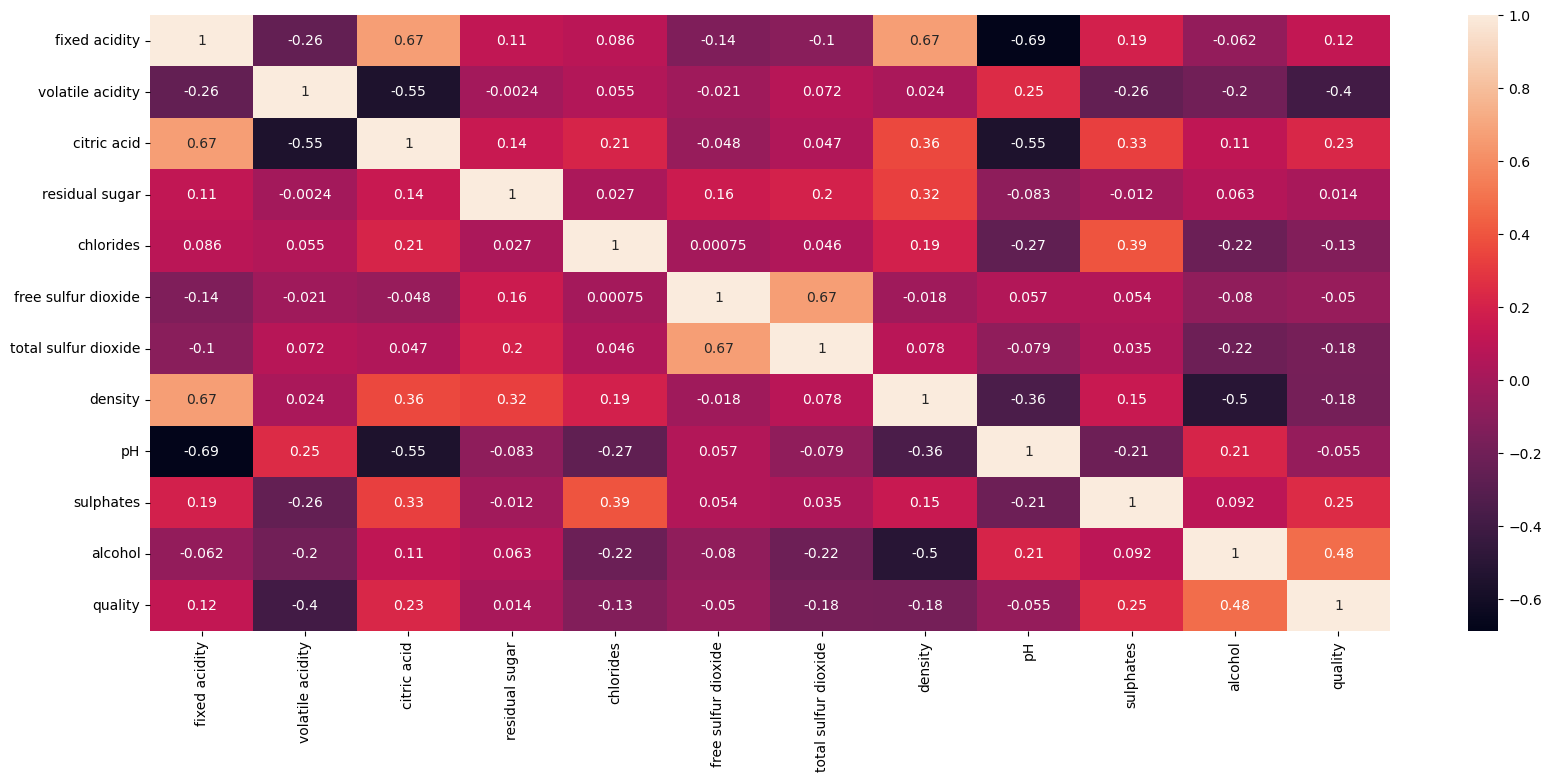

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True)

**Dropping columns which has least correlation with the target**

In [13]:
df.drop(columns=['residual sugar', 'free sulfur dioxide'],axis=1, inplace=True)

**Boxplot-Check for outliers**

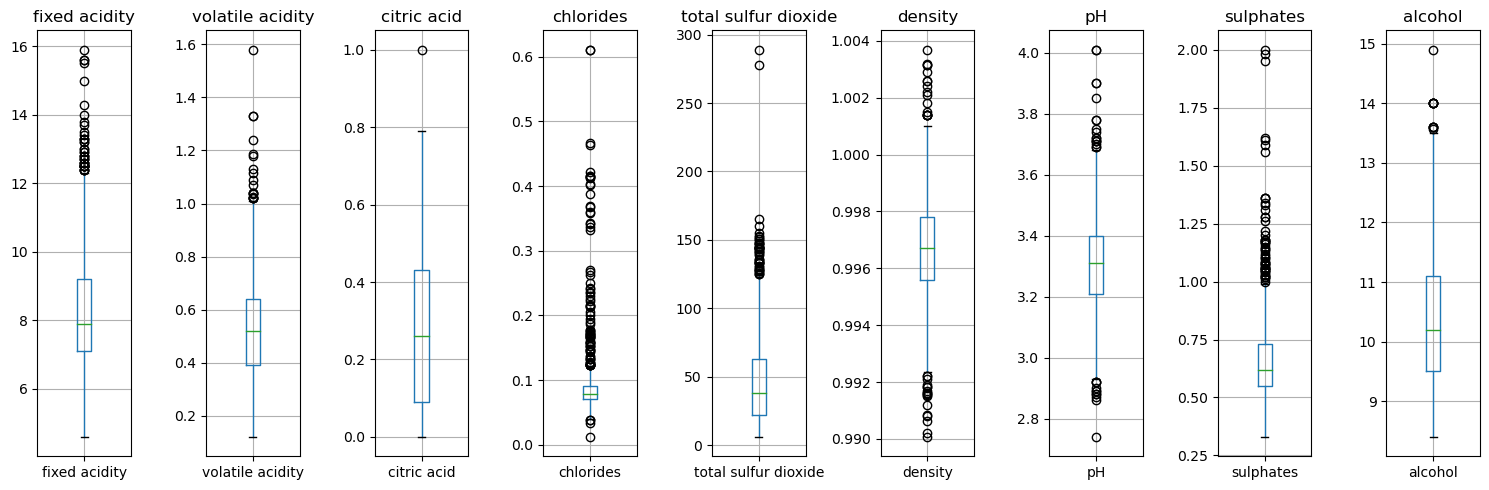

In [14]:
# Create subplots for box plots of all numerical features
num_cols = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

num_features_count = len(num_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_features_count, figsize=(15, 5))  # Adjust figsize as needed

# Loop through numerical columns and create box plots
for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Inference**
1. We see that all the independent features **have outliers**.

**Handling the outliers**

In [15]:
def remove_outliers_iqr(data):
    """
    Remove outliers from a numeric dataset using the IQR method.

    Parameters:
    data (list or numpy array): The dataset from which outliers need to be removed.

    Returns:
    cleaned_data (list or numpy array): The dataset with outliers removed.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
   
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [16]:
for column in df:
    df[column] = remove_outliers_iqr(df[column])

**Visualizing the Target Variable**

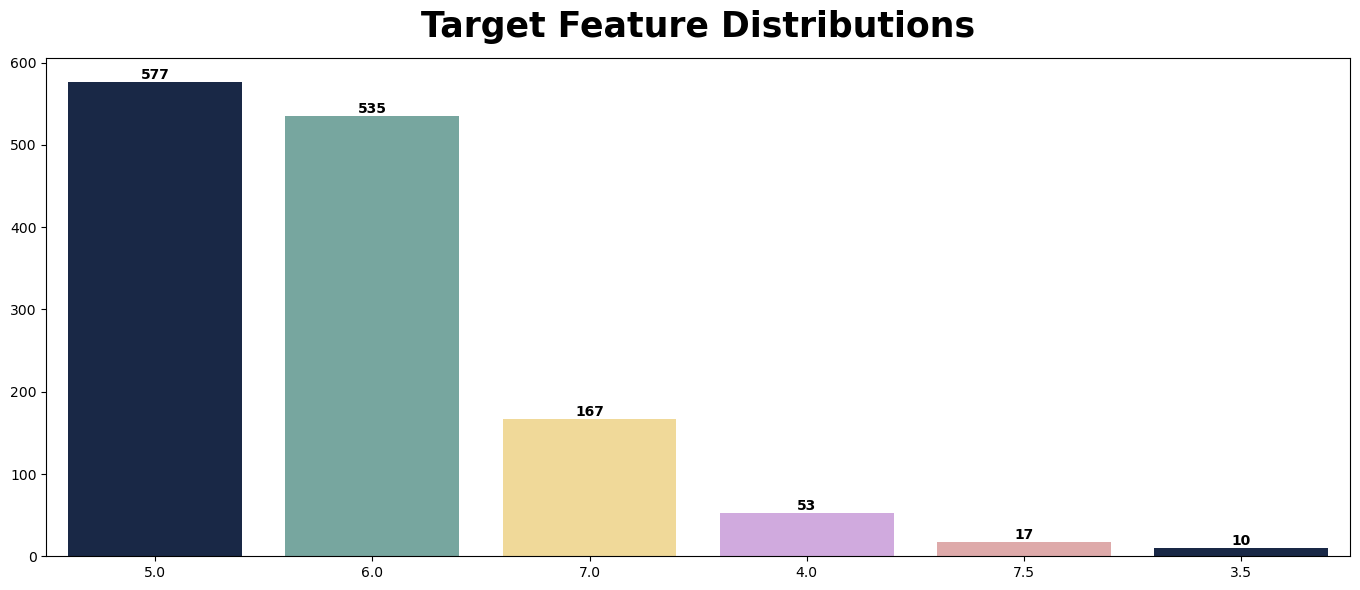

In [17]:
plt.figure(figsize=(13.7,6))
z = df["quality"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

**Inference**
1. * Most of the wines are having quality of **5 or 6**.
2. * We can clearly observe a **class-imbalance** in the target feature.

In [18]:
df["quality"].unique()

array([5. , 6. , 7. , 4. , 7.5, 3.5])

**Feature Engineering**

In [19]:
#Condition of Splitting: If quality > 6.5 => "good" ELSE => "bad"

bin_edges = [0,6.5,10]
group_names = ["Bad","Good"]

df["quality"] = pd.cut(df["quality"], bins=bin_edges, labels=group_names)
df["quality"].unique()

['Bad', 'Good']
Categories (2, object): ['Bad' < 'Good']

**Visualizing after pre-processing of the target feature**

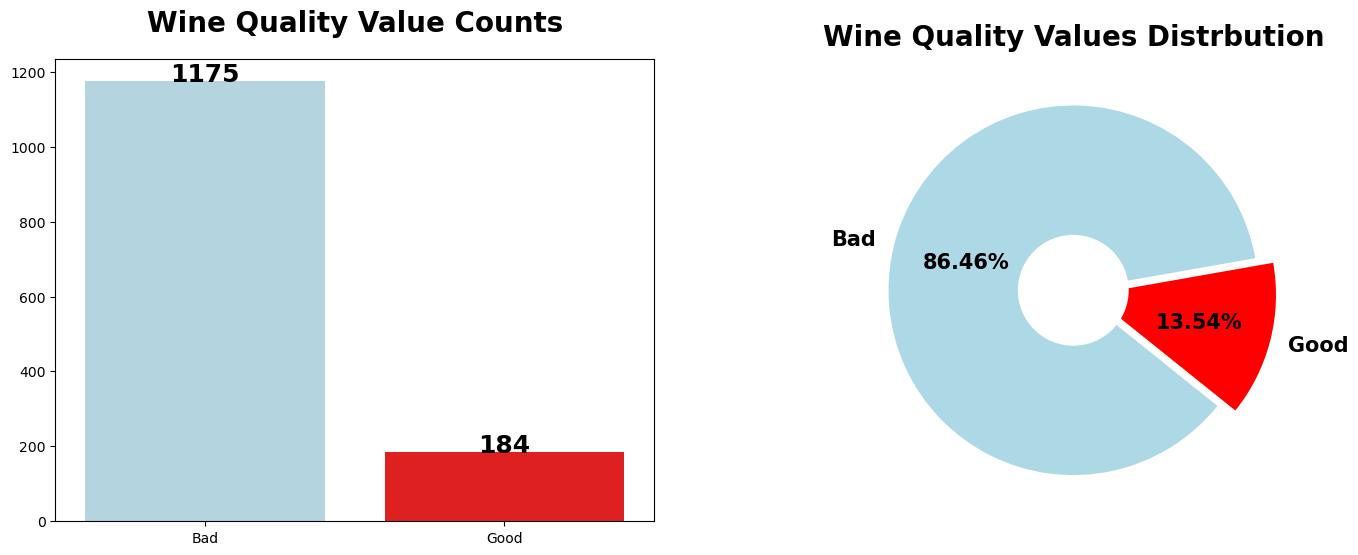

In [20]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
quality_counts = df["quality"].value_counts()
sns.barplot(x=quality_counts.index, y=quality_counts.values,palette=["lightblue","red"])
plt.title("Wine Quality Value Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(quality_counts.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

plt.subplot(1,2,2)
plt.pie(quality_counts, labels=["Bad","Good"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["lightblue","red"],explode=[0,0.1],startangle=10)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Wine Quality Values Distrbution" ,fontweight="black",size=20,pad=10)
plt.show()

**Inference**
1. We can still observe **class - imbalance**.
2. The dataset is having more **Bad Quality Wines** and very **low Good quality wines.**

**Encoding**

In [21]:
en = LabelEncoder()
cat_fea_selected=["quality"]
for cols in cat_fea_selected:
    df[cols] = en.fit_transform(df[cols])

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,0


**Splitting the data**

In [23]:
X = df.drop(columns=['quality'])  # Drop the 'target' column to get the features
y = df['quality']  # Scelect only the 'target' column as the target variable

In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4


In [25]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: quality, dtype: int32

**Train Test split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

**Scaling**

In [27]:
# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

**Model-Support Vector Classifier**

In [28]:
model = SVC()

In [29]:
model.fit(X_train,y_train)

SVC()

In [30]:
# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**Computing Model Accuracy**

In [31]:
print("Accuracy Score of Model on Training Data is :",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is :",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is : 89.34 %
Accuracy Score of Model on Testing Data  is : 88.86 %


**Inference**
1. The model has obtained 89.23 % accuracy on training Dataset and 88.64 % accuracy on testing dataset.
2. So there is **No underfitting or Overfitting** in the model.
3. The model is having a kind of **best fitting**.

**Model Evaluation using Different Metric Values**

In [32]:
Precision=print("Precision Score:",round(precision_score(y_test,y_test_pred, average="weighted")*100,2),"%")
Recall=print("Recall Score:",round(recall_score(y_test,y_test_pred, average="weighted")*100,2),"%")
F1=print("F1 Score:",round(f1_score(y_test,y_test_pred, average="weighted")*100,2),"%")

Precision Score: 87.43 %
Recall Score: 88.86 %
F1 Score: 86.54 %


**Inference**
1. We can observe that **precision, recall and F1 score are approxiamately same**, it means that our **model is achieving perfect balance between** correctly identifying **positive samples (recall)** and minimizing **false positives (precision).**    
2. The **high values** for **F1 score, recall score, and precision score**, all of which are **more than 0.8.**
3. These **metrics suggest** that the **model achieves good accuracy** in predicting the **positive class.**

**Model Evaluation using Confusion Matrix**

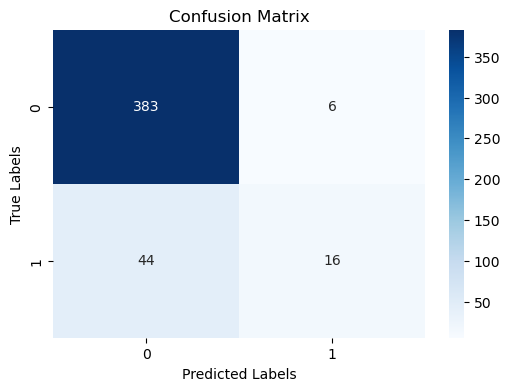

In [33]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

**Inference**
1. **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
2. **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

**Model Evaluation: ROC Curve and Area Under the Curve (AUC)**

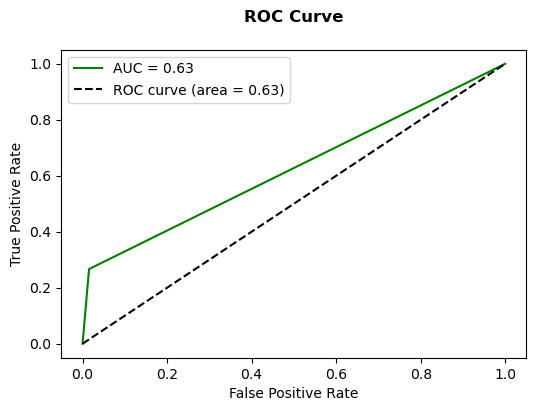

In [34]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_test_pred)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_test_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black",label='ROC curve (area = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

**Inference**
1. **AUC and ROC** values are **0.63**